In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df_index = pd.read_csv("economic_index.csv")

In [3]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [ ]:
# Drop unnecessary columns

df_index.drop(columns=["Unnamed: 0", "year", "month"], axis=1, inplace=True)  # inplace=True means: Make the change directly in the original DataFrame instead of creating a new one.

In [7]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [8]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

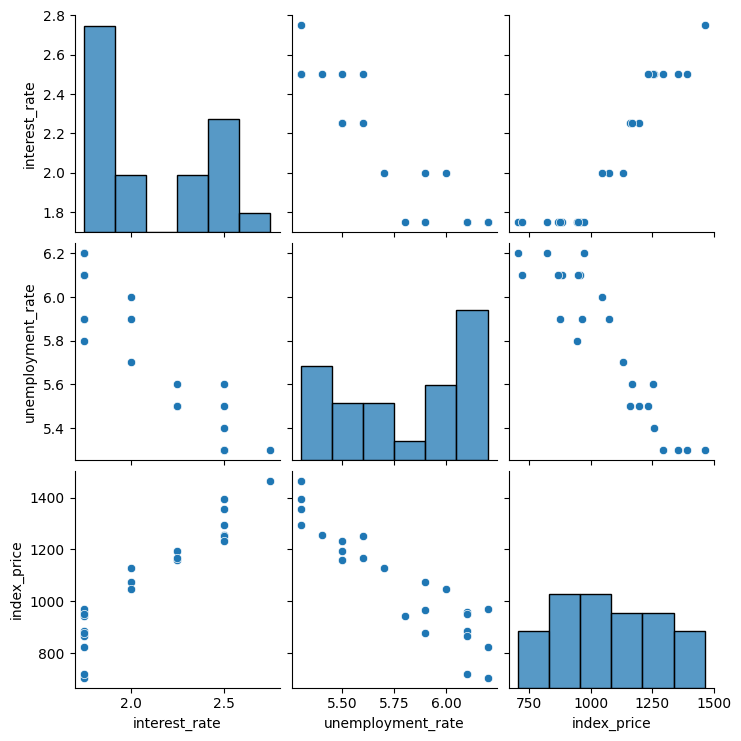

In [9]:
# lets do some visualization

import seaborn as sns
sns.pairplot(df_index)

In [10]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment Rate')

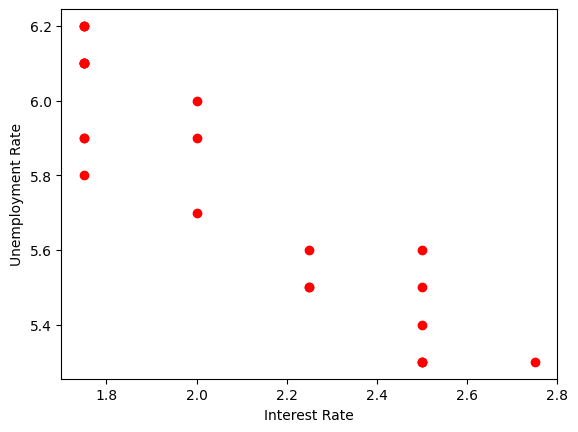

In [11]:
# visualize the datapoints more closely

plt.scatter(df_index['interest_rate'], df_index['unemployment_rate'], color='r')
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')

In [15]:
# independent and dependent features

# X = df_index[['interest_rate', 'unemployment_rate']]

# Select all rows and all columns except the last one
# These columns are the input features (independent variables)
X = df_index.iloc[:, :-1]

# Select all rows and only the last column
# This column is the output / target (dependent variable)
y = df_index.iloc[:, -1]

In [16]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [17]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [18]:
# train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [23]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='index_price'>

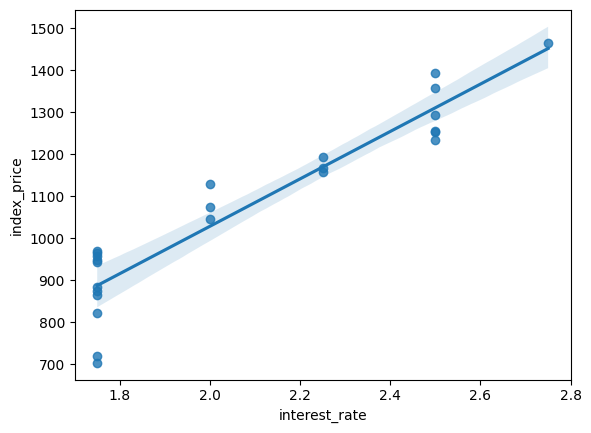

In [27]:
# sns.regplot() is used to draw a scatter plot with a best-fit regression line

# x = df_index['interest_rate']
# This is the independent variable (input feature) shown on X-axis

# y = df_index['index_price']
# This is the dependent variable (target/output) shown on Y-axis

sns.regplot(x=df_index['interest_rate'], y=df_index['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

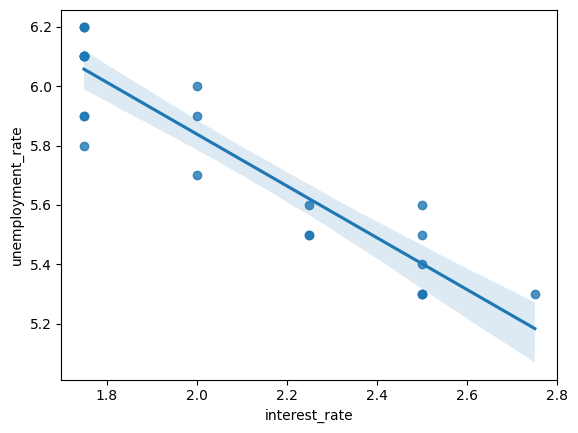

In [28]:
sns.regplot(x=df_index['interest_rate'], y=df_index['unemployment_rate'])

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

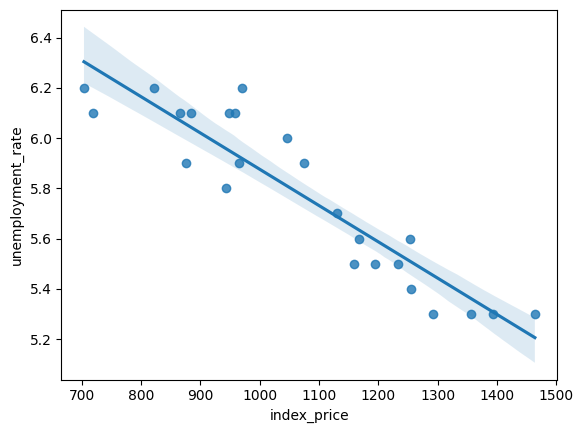

In [30]:
sns.regplot(x=df_index['index_price'], y=df_index['unemployment_rate'])

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [33]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
regression = LinearRegression()

In [36]:
regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [37]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Perform cross-validation on the training data

validation_score = cross_val_score(
    regression,  # The Linear Regression model to be evaluated
    X_train,  # Input features of training data
    y_train,   # Target values of training data
    scoring='neg_mean_squared_error',  # Use negative MSE as evaluation metric
    cv=3  # Split the data into 3 folds for cross-validation
)

In [39]:
np.mean(validation_score)

np.float64(-5914.828180162386)

In [41]:
# prediction
y_pred = regression.predict(X_test)

In [42]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [43]:
# Performance Metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [44]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306604
73.80444932337097
90.04758423359621


In [46]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)
print(score)

# display adjusted R-squared
print(1 - (1-score)*(len (y_test) - 1) / (len (y_test) - X_test.shape[1] - 1))

0.7591371539010257
0.5985619231683761


### Assumptions

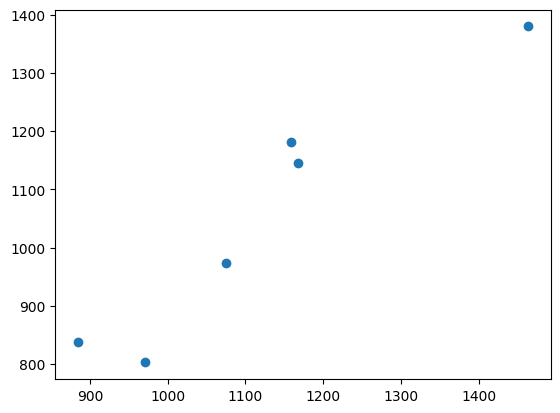

In [48]:
plt.scatter(y_test, y_pred)

In [49]:
residuals = y_test - y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


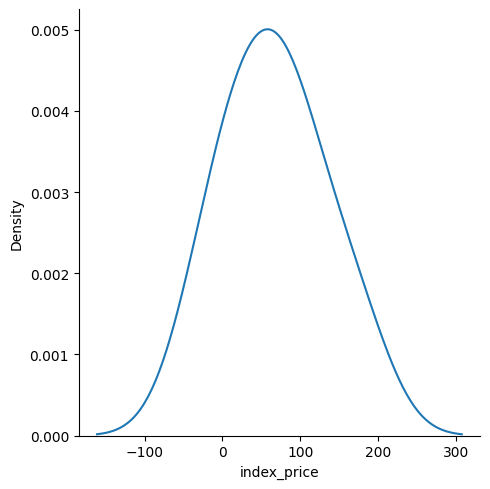

In [50]:
# Plot the residuals

sns.displot(residuals, kind = 'kde')

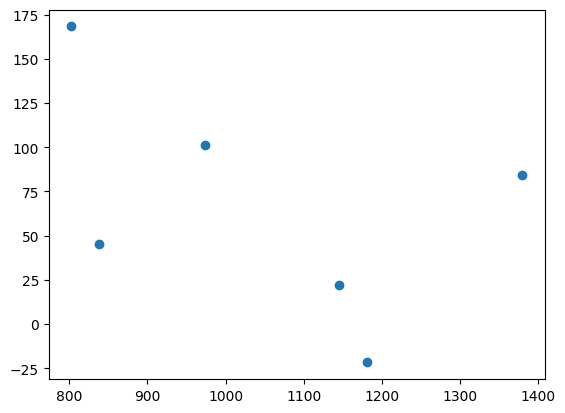

In [51]:
# Scatter plot with respect to prediction and residuals

plt.scatter(y_pred, residuals)

In [55]:
# OLS Linear Regression

import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()

In [56]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Wed, 24 Dec 2025   Prob (F-statistic):                       0.754
Time:                        19:56:01   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
print(regression.coef_)

[  88.27275507 -116.25716066]
